<div style="text-align: right"> Final edit : 2021.10.15 </div>

# [데이콘] 데이터 분석 및 모델링 최종

* 대회 : [화학] 와인품질 분류-교육
* 주최 : 데이콘
* 데이터 다운로드 : https://dacon.io/competitions/open/235610/overview/description
* 정리 : Jupyter Notebook

## 일반적인 머신러닝(ML), 딥러닝(DL) 문제해결 프로세스

    1. 데이터 로드
    2. 결측치 확인 및 제거
    3. 이상치 확인 및 제거
    4. 변수선택
    5. 데이터 정규화
    6. 모델 생성 및 학습
     6-1 Regression :LASSO, Ridge 모델 
     (제외) 6-2 Deep Learning : Keras 기본모델
     6-3. RandomForestRegressor
    7. Grid Search
    8. Cross Validation

# 1. 데이터 로드

In [1]:
# 모듈 불러오기
import pandas as pd
import numpy as np

# 시각화 모듈 불러오기
%matplotlib inline
import matplotlib.pyplot as plt

#### 1) 데이터 셋 split (train, test)

In [2]:
# 데이터 로드
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [3]:
print(train.shape)
print(test.shape)

(5497, 14)
(1000, 13)


* train data<br>
학습용 데이터는 5,497 행, 14개 변수로 이뤄져 있습니다.<br>
변수는 독립변수가 13개, 종속변수(target y : qualtiy) 1개로서 총 14개 입니다.

* test data<br>
테스트용 데이터는 1,000 행, 13개 변수로 이뤄져 있습니다.<br>
target y : qualtiy는 제외되었습니다.

In [4]:
# 학습 데이터에 대한 전반적인 데이터 정보를 살펴봅니다.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


# 2. 결측치 확인 및 제거

#### 1) 결측치를 확인합니다

In [5]:
train.isnull().sum()

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

실무 데이터에서는 결측치가 반드시 존재하는데 본 데이터는 이미 제거가 되었습니다.<br>
결측치 확인은 train.isnull().sum() 를 통해 확인 할 수도 있고, 아래 코드로 시각화해서 확인할 수도 있습니다.

<AxesSubplot:>

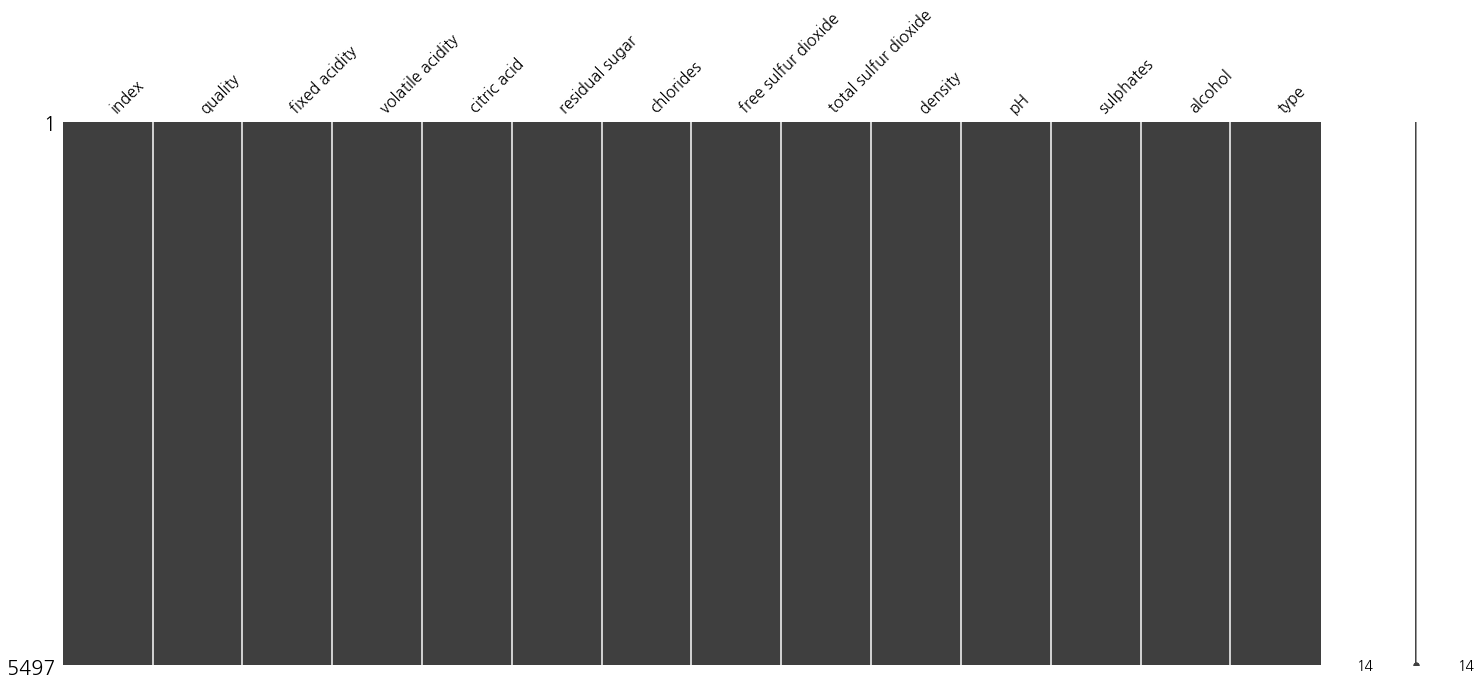

In [6]:
# !pip install missingno
import matplotlib.pyplot as plt
import missingno as msno

%matplotlib inline

# 변수명이 한글로 구성되어 있다면 다음 코드로 폰트를 설정합니다.
plt.rc('font', family = 'NanumGothic')
msno.matrix(train)

# 3. 이상치 확인 및 제거

#### 1) 이상치를 확인해기 위해서는 변수별 EDA를 수행해야 합니다.
통일성을 위해서 주어진 방법을 쓰겠습니다.

In [7]:
train.columns

Index(['index', 'quality', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'type'],
      dtype='object')

In [8]:
train['type']

0       white
1         red
2       white
3       white
4       white
        ...  
5492    white
5493    white
5494    white
5495    white
5496    white
Name: type, Length: 5497, dtype: object

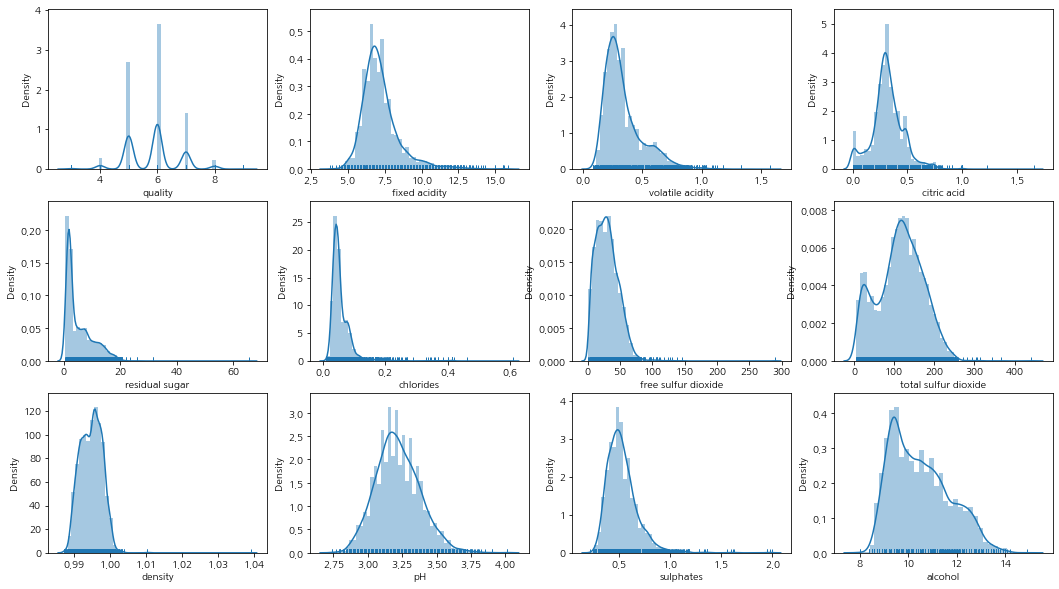

In [9]:
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

# 컬럼별 Data 분포 히스토그램

fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (18, 10))
num = 0

ax = ax.flatten()
for col in list(train.columns[1:13]): # 13번째 변수인 type은 범주형 변수로서 int 형으로 변환할 예정입니다.
    sns.distplot(train[col], ax = ax[num], kde = True, rug = True) # 커넬밀도추정 KDE : histogram은 구간 bin 분할에 따라 왜곡
    num += 1    
plt.show()

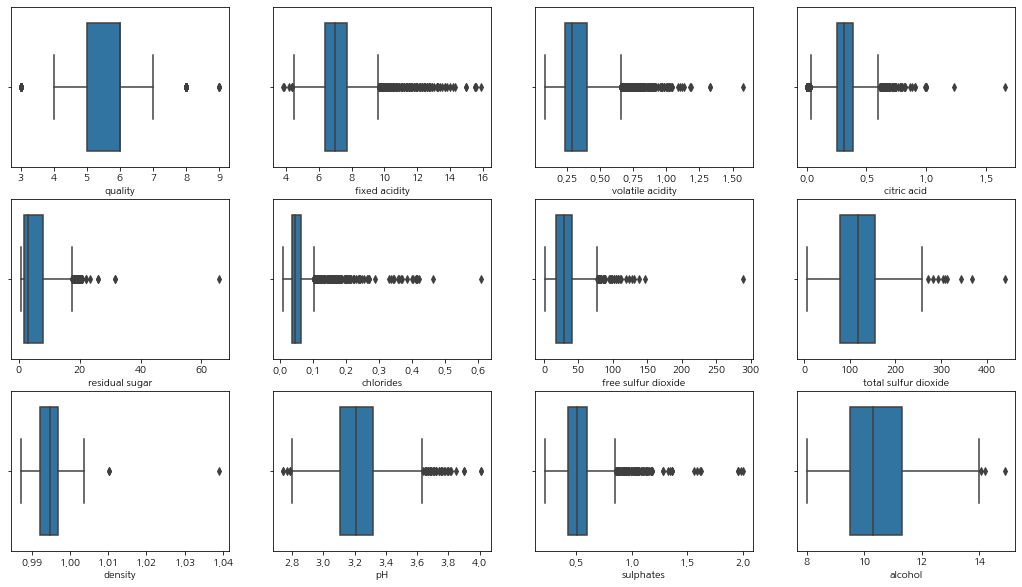

In [11]:
#컬럼별 Data 분포 Boxplot
fig, ax = plt.subplots(nrows = 3, ncols = 4, figsize = (18, 10))
num = 0
ax = ax.flatten()
for col in list(train.columns[1:13]):
    sns.boxplot(train[col], ax = ax[num])
    num += 1    
plt.show()

변수별 boxplot을 살펴보면 각 변수별 통계적 이상치가 존재하는 것을 알수 있습니다.<br>
이상치는 제거 하거나 대체할 때는 Domain Knowledge가 필요합니다.<br>
우선 와인에 대한 Domain Knowledge가 없는 상태이므로 제거하지는 않겠습니다.

#### 2) 이상치 제거(방법, 우리는 skip 하겠습니다)

교과서적인 방법으로는 1분위 값과 3분위 값의 차이를 IQR로 설정하고,  
1분위값과 3분위값에서 IQR값의 1.5배수 만큼 큰 값과 작은 값은 이상치로 판단 합니다.  
위의 BOX PLOT에서 점으로 표현된 값을 제거한다고 보면 됩니다.

다시 한번, 이것은 교과서적인 방법이며 실무에서는 그렇게 제거해서는 안됩니다.
도메인 지식에 기반하여 이상치를 검토하고 제거 또는 대체해야 합니다.

In [38]:
# 통계적 이상치를 제거하는 방법에 대해서 아래 코드를 참고해주세요

In [11]:
'''
quartile_1 = train.quantile(0.25)
quartile_3 = train.quantile(0.75)

IQR = quartile_3 - quartile_1
condition = (train < (quartile_1 - 1.5 * IQR)) | (train > (quartile_3 + 1.5 * IQR))
condition = condition.any(axis=1)
train = train[condition]
print(train.shape)
'''

'\nquartile_1 = train.quantile(0.25)\nquartile_3 = train.quantile(0.75)\n\nIQR = quartile_3 - quartile_1\ncondition = (train < (quartile_1 - 1.5 * IQR)) | (train > (quartile_3 + 1.5 * IQR))\ncondition = condition.any(axis=1)\ntrain = train[condition]\nprint(train.shape)\n'

* __범주형 변수에 대해 수치형(int 정수) 변수로 변환해주겠습니다.<br>__
통상적으로는 pandas.get_dummies 함수를 사용합니다.  


* __pandas 공식 Document 참고<br>__
https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [12]:
# type에는 white와 red 두 종류가 있습니다.
# 각각 0,1로 변환합니다.
train['type'] = train['type'].map({'white':0, 'red':1}).astype(int)
test['type'] = test['type'].map({'white':0, 'red':1}).astype(int)

# 4. 변수선택
변수선택을 위해 각 변수의 영향도를 검토해야 합니다.

#### 1) 우선 상관관계를 그려보겠습니다.

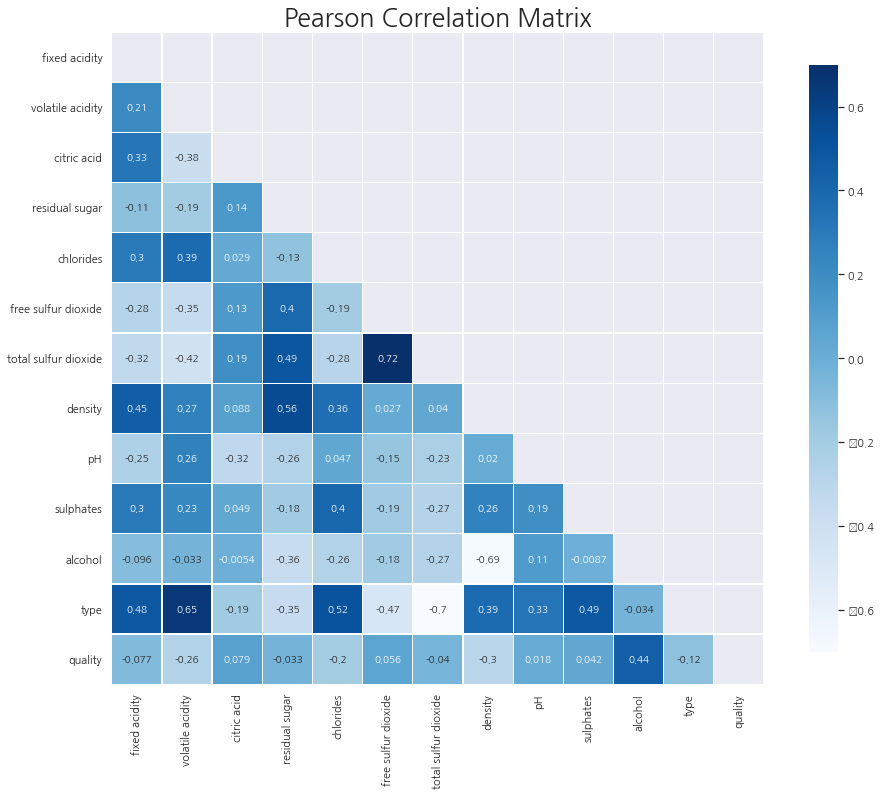

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Seabon 패키지에서 한글폰트 설정합니다.
sns.set(font="NanumGothic")

# 경고메세지는 무시하겠습니다.
import warnings
warnings.filterwarnings(action='ignore')

# 
features = ['fixed acidity', 'volatile acidity', 'citric acid',\
       'residual sugar', 'chlorides', 'free sulfur dioxide',\
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',\
       'type','quality']


# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(train[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(train[features].corr(),
            linewidths=0.25,# 경계면 선구분 cf. 실선(0.5)으로 구분하기
            vmax=0.7, # 컬러바 범위 : 최소값 미지정 최대값 0.7 
            square=True,
            cmap="Blues", #히트맵 색깔. blue, green #"BuGn_r" to reverse # Blues # BuGn
            linecolor='w',# 라인 색은 흰색(white)
            
            annot=True,            # 실제 값을 표시한다
            annot_kws={"size":10},  # 실제값 폰트 사이즈
            mask=mask,             # 위에서 설정한 마스크 부분(가릴부분) 지정한다
            cbar_kws={"shrink": .9}); # 오른쪽 컬러바 크기 줄이기 90% 크기

* 맨 아래 target y 변수인 quality 를 보면, <br>
**alcohol(알콜도수)** 처럼 색이 짙은 변수일수록 상관계수가 높습니다.<br>
* 반면에 fixed acid나 citric acid처럼 상관관계가 0.1 이하인 변수들도 있습니다.<BR>  
    

* 상관관계는 양의 상관관계와 음의 상관관계가 있고, 약한 상관관계와 강한 상관관계가 있습니다.
* 음의 상관관계도 고려해야하므로, 통상 상관계수에 절대값을 취해서 0.1(자체 판단)이하 변수를 제거합니다.<BR>
  : Domain Knowledge가 중요 요소이므로 본 과제에서는 변수제거 파트에서 SKIP 하겠습니다.

In [16]:
# 허리둘레와 각 변수들 간의 상관관계를 그려보겠습니다.
co = train.corrwith(train['quality'])

# 상관계수를 내림차순으로 정리해서 출력해보죠
print(co.sort_values(ascending=False))

# 절대값으로 취합니다.
co_abs = abs(co)

quality                 1.000000
alcohol                 0.439615
citric acid             0.079157
free sulfur dioxide     0.055574
sulphates               0.042068
pH                      0.017931
index                  -0.008045
residual sugar         -0.032848
total sulfur dioxide   -0.039732
fixed acidity          -0.076506
type                   -0.118280
chlorides              -0.198148
volatile acidity       -0.261557
density                -0.299831
dtype: float64


In [17]:
# 상관계수의 절대값을 내림차순으로 정리합니다.
co_sort = co_abs.sort_values(ascending=False)
co_sort = co_sort[co_sort>0.01]
co_sort.to_frame().index

# 상관관계가 낮은 변수를 제거하고 새로운 변수를 구성합니다.
new_features = co_sort.to_frame().index
new_features

Index(['quality', 'alcohol', 'density', 'volatile acidity', 'chlorides',
       'type', 'citric acid', 'fixed acidity', 'free sulfur dioxide',
       'sulphates', 'total sulfur dioxide', 'residual sugar', 'pH'],
      dtype='object')

In [18]:
print(len(features))
print(len(new_features))

print('제거된 변수의 갯수 :{}개'.format(len(features) - len(new_features)))

13
13
제거된 변수의 갯수 :0개


상관계수가 0.1보다 낮은 변수인 서울_인허가 물량 이 제거 되었습니다. <br>
* 이 부분은 사용하지 않고 기존 features로 계속 진행하겠습니다.

### Data Set 정리
지금까지 정리한 이상치와 변수선택을 고려하여 dataset을 정리합니다.

In [19]:
# # 데이터 불러오기
features = ['alcohol', 'density', 'volatile acidity', 'chlorides',
       'type', 'citric acid', 'fixed acidity', 'free sulfur dioxide',
       'sulphates', 'total sulfur dioxide', 'residual sugar', 'pH']

target = 'quality'

X = train[features]
y = train[target]

In [20]:
X

,alcohol,density,volatile acidity,chlorides,type,citric acid,fixed acidity,free sulfur dioxide,sulphates,total sulfur dioxide,residual sugar,pH
0,10.2,0.99432,0.695,0.042,0,0.06,5.6,9.0,0.44,84.0,6.8,3.44
1,9.5,0.99690,0.610,0.067,1,0.14,8.8,10.0,0.59,42.0,2.4,3.19
2,10.9,0.99176,0.210,0.057,0,0.39,7.9,21.0,0.52,138.0,2.0,3.05
3,10.8,0.99390,0.210,0.046,0,0.31,7.0,29.0,0.50,108.0,6.0,3.26
4,10.9,0.99550,0.400,0.059,0,0.26,7.8,32.0,0.43,178.0,9.5,3.04
...,...,...,...,...,...,...,...,...,...,...,...,...
5492,10.1,0.99320,0.150,0.029,0,0.29,7.7,10.0,0.39,64.0,1.3,3.35
5493,11.0,0.99074,0.180,0.034,0,0.36,6.3,26.0,0.51,111.0,1.2,3.16
5494,11.3,0.99096,0.150,0.035,0,0.34,7.8,31.0,0.72,93.0,1.1,3.07
5495,10.5,0.99195,0.410,0.042,0,0.31,6.6,18.0,0.41,101.0,1.6,3.13


# 5. 데이터 정규화(Data normalization)

- MinMax: 상한과 하한이 비교적 명확하고, 상한과 하한 사이에 값들이 어느정도 일정하게 분포하는 경우에 사용 
- Standardization: 데이터가 정규 분포를 따를 때 사용하면 효과적
- y변수는 normalization을 하는 것이 일반적임, 왜냐하면 normalization은 특정 x 변수가 y 예측에 큰 영향을 끼치는 것을 방지하거나, gradient descent를 이용하는 학습을 좀 더 빠르게 하기 위해서이기 때문

__어떤 scaling을 할 것인지도 결국에는 잘 선택해야 할 문제... 실험해봤을 때 어떤 모델을 사용하느냐에 따라, 어떤 상황이냐에 따라서 성능이 다 달라짐__ <br>
참고: scaling 관련하여 여러 실험을 수행해서 정리해 놓은 좋은 소스 <br>
- 원문: https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf#:~:text=Normalization%20typically%20means%20rescales%20the,of%201%20(unit%20variance).
- 한글 번역문: https://databreak.netlify.app/2019-05-02-Normalization_vs_Standardization-Quantitative%20analysis/

## How?
- train / test(valid) split 먼저 수행
- train에 대해서 scaling 방법 학습
- scaling한 train 데이터를 이용하여 모델 학습
- train 데이터로 학습한 scaling 방법을 이용하여 test(valid) 데이터 scaling
- scaling한 test(valid) 데이터를 이용하여 모델 학습

In [18]:
# 우리는 Min-Max Scaler를 사용해보겠습니다.

In [21]:
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split                                                     

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.1, random_state=1)

# 피처 스케일링
scaler = preprocessing.MinMaxScaler()

train_X_norm = scaler.fit_transform(train_X)
valid_X_norm = scaler.fit_transform(valid_X)

# 6. 모델생성 및 학습

## 6.0 모델 선택 Model Selection(Carrot package)

### 6.0.1 Manual 방법

In [40]:
# !pip install catboost

In [37]:
target = train['quality']
train.drop(['index', 'quality'], axis=1, inplace=True)
test.drop('index', axis=1, inplace=True)

In [39]:
from sklearn.linear_model import RidgeClassifier, LogisticRegression  
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score



model_list = [RidgeClassifier(), LogisticRegression(), GaussianNB(), KNeighborsClassifier(n_neighbors=20), SVC(gamma = 0.01, C = 100, probability=True), 
              DecisionTreeClassifier(max_features=7 , max_depth=6,  min_samples_split=8), 
              RandomForestClassifier(random_state=2021), GradientBoostingClassifier(), AdaBoostClassifier(), XGBClassifier(), LGBMClassifier(), CatBoostClassifier(verbose=0)]
scores = []

for model in model_list:
    score = cross_val_score(model, train, target, cv=5, scoring='accuracy')
    scores.append(score.mean())


model_test = pd.DataFrame({'model':model_list, 'score':scores})
model_test.sort_values('score', ascending=False)

[08:50:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:50:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:50:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:50:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

,model,score
6,RandomForestClassifier(random_state=2021),0.675637
10,LGBMClassifier(),0.651989
11,<catboost.core.CatBoostClassifier object at 0x...,0.650169
9,"XGBClassifier(base_score=None, booster=None, c...",0.649077
7,GradientBoostingClassifier(),0.584681
4,"SVC(C=100, gamma=0.01, probability=True)",0.562843
0,RidgeClassifier(),0.532833
5,"DecisionTreeClassifier(max_depth=6, max_featur...",0.532288
1,LogisticRegression(),0.470622
3,KNeighborsClassifier(n_neighbors=20),0.450787


### 6.0.2 Pycaret

In [42]:
!python -m pip install --user pycaret

  Using cached pycaret-2.3.4-py3-none-any.whl (266 kB)
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached scipy-1.5.4-cp38-cp38-win_amd64.whl (31.4 MB)
  Using cached wordcloud-1.8.1-cp38-cp38-win_amd64.whl (155 kB)
  Using cached mlflow-1.20.2-py3-none-any.whl (14.6 MB)
  Using cached scikit_learn-0.23.2-cp38-cp38-win_amd64.whl (6.8 MB)
  Using cached gensim-3.8.3-cp38-cp38-win_amd64.whl (24.2 MB)
  Using cached kmodes-0.11.0-py2.py3-none-any.whl (18 kB)
  Using cached pyod-0.9.4-py3-none-any.whl
  Using cached textblob-0.15.3-py2.py3-none-any.whl (636 kB)
  Using cached umap_learn-0.5.1-py3-none-any.whl
  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

In [43]:
# !pip install pycaret

In [53]:
from pycaret.utils import version
print(version())

2.3.4


In [57]:
!pip install --user scikit-learn==0.23.2

  Using cached scikit_learn-0.23.2-cp38-cp38-win_amd64.whl (6.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.0
    Uninstalling scikit-learn-0.23.0:
      Successfully uninstalled scikit-learn-0.23.0


In [ ]:
from pycaret.classification import *

In [58]:
train = pd.read_csv('./data/train.csv')
setup_clf = setup(data=train, target='quality', session_id=2021, categorical_features=['type'], ignore_features=['index'])

,Description,Value
0,session_id,2021
1,Target,quality
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(5497, 14)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


AttributeError: 'Simple_Imputer' object has no attribute 'fill_value_categorical'

In [59]:
best_3 = compare_models(sort='Accuracy', n_select=3)

In [ ]:
tuned_best_3 = [tune_model(i) for i in best_3]
tuned_best_3

In [ ]:
blender_best_3 = blend_models(estimator_list=tuned_best_3)

In [ ]:
final_model = finalize_model(blender_best_3)
prediction = predict_model(final_model, data=test)

In [ ]:
sub['quality'] = prediction['Label']
sub.to_csv('wine_pycaret.csv', index=False)
files.download('wine_pycaret.csv')

## 6-1.  회귀분석 Linear Regression

In [22]:
# 회귀모델 학습
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_X_norm, train_y)

# 예측값 생성
predicts = lr.predict(valid_X_norm)

# 오차계산
from sklearn.metrics import mean_absolute_error

valid_MAE = mean_absolute_error(valid_y, predicts)
print(f"valid MAE: {valid_MAE:.3f}")

valid MAE: 1.525


Mean Absolute Error값이 매우 낮게 나왔습니다.

y = ax + b 에서 계수 값인 a를  coefficient, b값을 절편 inercept 값이라고 합니다.

In [23]:
lr_coef_df = pd.DataFrame(lr.coef_, index=X.columns, columns=["lr_coef"])
lr_coef_df.sort_values(ascending=False, by='lr_coef')

,lr_coef
residual sugar,4.355647
sulphates,1.397013
alcohol,1.357907
free sulfur dioxide,1.223255
fixed acidity,1.112489
pH,0.704226
type,0.380931
citric acid,-0.200913
chlorides,-0.271370
total sulfur dioxide,-0.457333


In [25]:
# 모델 정확도 계산
accuracy = lr.score(valid_X_norm, valid_y)
print("예측모델 정확도는 {:.2f}% 입니다.".format(float(accuracy*100)))

예측모델 정확도는 -300.24% 입니다.


In [58]:
# 파이썬 문자열 formatting 참고
# https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=pgh7092&logNo=221103140268

### 실제값과 모델이 예측한 값을 비교

Text(0.5, 1.0, '실제값 vs 예측값 : $Y$ vs $\\hat{Y}$')

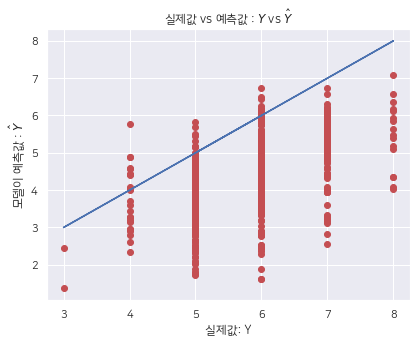

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

# 한글폰트 설정
import matplotlib.font_manager as fm
path = 'C:\\Windows\\Fonts\\NanumSquareRoundB.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

# 플롯 사이즈 설정
plt.figure(figsize=(6.5, 5))

Y_pred = lr.predict(valid_X_norm)

plt.scatter(valid_y, Y_pred, color='r')
plt.plot(valid_y, valid_y)

plt.xlabel("실제값: Y")
plt.ylabel("모델이 예측값 : $\hat{Y}$")
plt.title("실제값 vs 예측값 : $Y$ vs $\hat{Y}$")

In [27]:
from sklearn.metrics import mean_absolute_error

train_MAE = mean_absolute_error(train_y, lr.predict(train_X_norm))
valid_MAE = mean_absolute_error(valid_y, lr.predict(valid_X_norm))

print(f"train MAE: {train_MAE:.3f}")
print(f"valid MAE: {valid_MAE:.3f}")

train MAE: 0.567
valid MAE: 1.525


## LR vs. Ridge vs. Lasso

Resgression 모델에는 크게 LASSO와 Ridge가 있습니다.<br>
오차를 계산하는 방식에 따라 L1 Norm 과 L2 Norm 방식을 사용하기 때문입니다.<br>
쉽게 L1 Norm는 예측된 y값과 실제 y값의 차이에 절대값 개념이고, L2 Norm 은 오차에 제곱을 한 값입니다.

### 1) Lasso regression

In [25]:
from sklearn.linear_model import Lasso

In [26]:
lasso = Lasso(alpha=1)
lasso.fit(train_X_norm, train_y)

train_rmse = metrics.mean_absolute_error(train_y, lasso.predict(train_X_norm))
valid_rmse = metrics.mean_absolute_error(valid_y, lasso.predict(valid_X_norm))

print(f"train: {train_rmse:.3f}")
print(f"test: {valid_rmse:.3f}")

train: 3.180
test: 2.684


### 2) Ridge regression

In [27]:
from sklearn.linear_model import Ridge

In [28]:
ridge = Ridge(alpha=1)
ridge.fit(train_X_norm, train_y)

train_MAE = metrics.mean_absolute_error(train_y, ridge.predict(train_X_norm))
valid_MAE = metrics.mean_absolute_error(valid_y, ridge.predict(valid_X_norm))

print(f"train: {train_MAE:.3f}")
print(f"test: {valid_MAE:.3f}")

train: 1.985
test: 2.949


## 6.2 서포트 벡터 머신(SVM)

In [62]:
from sklearn.svm import SVC

# creating the model
model = SVC()

# feeding the training set into the model
model.fit(train_X_norm, train_y)

# predicting the results for the test set
y_pred = model.predict(train_X_norm)

# calculating the training and testing accuracies
print("training accuracy :", model.score(train_X_norm, train_y))
print("testing accuracy :", model.score(valid_X_norm, valid_y))

training accuracy : 0.5631112121901296
testing accuracy : 0.4890909090909091


In [63]:
# finding the best parameters for the SVC model

param = {
    'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(model, param_grid = param, scoring = 'accuracy', cv = 10)


In [ ]:
grid_svc.fit(train_X_norm, train_y)

In [ ]:
grid_svc.best_params_

In [ ]:
# creating a new SVC model with these best parameters

model2 = SVC(C = 1.4, gamma = 0.1, kernel = 'rbf')
model2.fit(train_X_norm, train_y)
y_pred = model2.predict(train_X_norm)

print(classification_report(valid_y, y_pred))

## (제외) 6-2. 딥러닝(Deep Learning)
구글에서 개발한 딥러닝 플랫폼 tensorflow를 사용하겠습니다.<br>
먼저 텐서플로우 설치가 필요합니다.

### 딥러닝 모델 설계

* 과적합 방지 : Dropout<br>
train data set 에 지나치게 과적합(overfit) 되는 것을 방지하기 위해서 Dropout을 활용합니다.<br>
과적합 방지 방법은 Batch Normalization, Dropout 등이 있습니다. 개별적으로 더 공부해 보시기 바랍니다.

* 참고서적 : 딥러닝을 위한 자연어처리 입문(웹북)
https://wikidocs.net/61374

* 딥러닝 모델 학습 시 몇 개의 노드를 제외하고 학습하는 방법
* 랜덤하게 사용하지 않을 노드를 결정
* 계산이 줄어드는 만큼 variance가 줄어들어 overfitting을 줄일 수 있음.

[MLP설명](https://deepestdocs.readthedocs.io/en/latest/004_deep_learning_part_2/0040/)

**Multi Layer Perceptron**

In [60]:
from sklearn.neural_network import MLPClassifier

# creating the model
model = MLPClassifier(hidden_layer_sizes = (100, 100), max_iter = 150)

# feeding the training data to the model
model.fit(train_X_norm, train_y)

# calculating the accuracies
print("training accuracy :", model.score(train_X_norm, train_y))
print("testing accuracy :", model.score(valid_X_norm, valid_y))

training accuracy : 0.5842619968160109
testing accuracy : 0.4018181818181818


## 6-3. 랜덤포레스트(Random Forest)

## 6.3.1  RandomForestClassifier

싸이킷런 공식 튜토리얼 [랜덤 포레스트 클레시파이어](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [33]:
# 필수 라이브러리
import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import RandomForestRegressor


# 2. 변수선택(독립변수, 목적변수)
features = ['alcohol', 'density', 'volatile acidity', 'chlorides',
       'type', 'citric acid', 'fixed acidity', 'free sulfur dioxide',
       'sulphates', 'total sulfur dioxide', 'residual sugar', 'pH']
target = 'quality'
            
X = train[features]
y = train[target]

# 램덤 시드 고정
SEED = 1
random.seed(SEED)
np.random.seed(SEED)


# 데이터 전처리
from sklearn import datasets

from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
                                                      
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)

# 피처 스케일링
scaler = preprocessing.MinMaxScaler()

train_X_norm = scaler.fit_transform(train_X)
valid_X_norm = scaler.fit_transform(valid_X)

# 회귀모델 학습

RF = RandomForestClassifier()
RF.fit(train_X_norm, train_y)

# 예측값 생성
predicts = RF.predict(valid_X_norm)

# 오차계산
from sklearn.metrics import mean_absolute_error

valid_MAE = mean_absolute_error(valid_y, predicts)
print(f"valid MAE: {valid_MAE:.3f}")

test_X_norm = scaler.transform(test[features])
final_predict = RF.predict(test_X_norm)

valid MAE: 0.595


## 7. Grid Search
Best Parameter와 모델을 찾는 코드입니다.

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 6, 9],
    'min_samples_split': [0.01, 0.05, 0.1],
    'max_features': ['auto', 'sqrt'],
}

RF = RandomForestClassifier()

from sklearn.model_selection import KFold

kf = KFold(random_state=30,
           n_splits=10,
           shuffle=True,
          )

# define grid_search
grid_search = GridSearchCV(estimator=RF, 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2
                          )

# fit with (x_train, y_train)
grid_search.fit(train_X_norm, train_y)

grid_search.best_params_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


{'max_depth': None,
 'max_features': 'auto',
 'min_samples_split': 0.01,
 'n_estimators': 150}

In [34]:
#위에서 찾은 best parameter 을 갖는 모델을 아래와 같이 생성해줄 수 있습니다.

In [35]:
best_model = grid_search.best_estimator_

In [36]:
# 필수 라이브러리
import pandas as pd
import numpy as np
import random

# 데이터 전처리
from sklearn import datasets
train = df[df.index < pd.to_datetime('2019-12-31')]
test = df[df.index > pd.to_datetime('2019-12-31')]


# 2. 변수선택(독립변수, 목적변수)
features = ['강남구_전세가', '서울_인허가물량', '서울_미분양물량', 'NASDAQCOM', 
                 'CSUSHPISA', 'HSN1F', 'INTDSRUSM193N', 'USSTHPI', 'M2', 'ICSA']
target = '강남구_매매가'
            
X = train[features]
y = train[target]

# 램덤 시드 고정
SEED = 1
random.seed(SEED)
np.random.seed(SEED)


# 데이터 분할
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
                                                      
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)

# 피처 스케일링
scaler = preprocessing.MinMaxScaler()

train_X_norm = scaler.fit_transform(train_X)
valid_X_norm = scaler.fit_transform(valid_X)
test_X_norm = scaler.transform(test[features])


# GridSearch
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300, 350, 400],
    'max_depth': [None, 6, 12, 24, 32, 64],
    'min_samples_split': [0.01, 0.05, 0.1],
    'max_features': ['auto', 'sqrt'],
}

RF = RandomForestRegressor()

# Cross Validation
from sklearn.model_selection import KFold
kf = KFold(random_state=30,
           n_splits=10,
           shuffle=True,
          )


# define grid_search
grid_search = GridSearchCV(estimator=RF, 
                           param_grid=param_grid, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2
                          )

grid_search.fit(train_X_norm, train_y)
grid_search.best_params_

# 베스트 모델 학습
best_model.fit(train_X_norm, train_y)

# 예측값 생성
predicts = best_model.predict(valid_X_norm)

# 오차계산
from sklearn.metrics import mean_absolute_error

valid_MAE = mean_absolute_error(valid_y, predicts)
print(f"valid MAE: {valid_MAE:.3f}")

# test_X_norm = scaler.transform(test[features])
final_predict = best_model.predict(test_X_norm)


Fitting 10 folds for each of 252 candidates, totalling 2520 fits
valid MAE: 0.889


In [37]:
print(grid_search.best_params_)

{'max_depth': 64, 'max_features': 'auto', 'min_samples_split': 0.05, 'n_estimators': 200}


# grid search 참고자료
https://statkclee.github.io/model/model-python-xgboost-hyper.html